<a href="https://colab.research.google.com/github/themidwestcanapps/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_Intstacart_flights_tilltidy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-03 13:43:52--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.164.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.164.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  56.6MB/s    in 3.5s    

2019-10-03 13:43:56 (56.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)



## Load data

Here's a list of all six CSV filenames

In [0]:
#!ls -lh *.csv

For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import IPython 
from IPython.display import display

In [0]:
import pandas as pd 

aisles = pd.read_csv('aisles.csv')

print(aisles.shape)

aisles.head(10)

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [0]:
dept = pd.read_csv('departments.csv')

print(dept.shape)


(21, 2)


In [0]:
display(dept.head())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
df_orders = pd.read_csv('orders.csv')

display(df_orders.shape)


(3421083, 7)

In [0]:
df_orders.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [0]:
count_id = df_orders['user_id'].unique()

In [0]:
display(count_id.shape)

(206209,)

In [0]:
3421083 / 206209

16.590367054784224

In [0]:
Banana
Bag of Organic Bananas
Organic Strawberries
Organic Baby Spinach
Organic Hass Avocado
Organic Avocado
Large Lemon
Strawberries
Limes
Organic Whole Milk

SyntaxError: ignored

In [0]:
df_orders

In [0]:
tro = pd.cut(df_orders['order_dow'], [0, 1, 2, 3, 4, 5, 6])
df_orders.pivot_table('order_hour_of_day', ['days_since_prior_order', tro], 'user_id')
             

NameError: ignored

In [0]:
who_user = df_orders.apply(lambda rwo: row[df_orders['user_id'].isin([3])])

KeyboardInterrupt: ignored

In [0]:
df_products = pd.read_csv('products.csv')

display(df_products.head())

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
df_tops = df_products.apply(lambda row: row[df_products['product_name']
                                            .isin(['Bananas', 'Bag of Organic Bananas',
                                                   'Organic Strawberries', 'Organic Baby Spinach',
                                                   'Organic Hass Avacado', 'Organic Avacado', 
                                                   'Oragnic Avacado', 'Large Lemon',
                                                   'Strawberries', 'Limes',
                                                   'Organic Whole Milk'])])



In [0]:
display(df_tops)

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
39275,39276,Bananas,24,4
47625,47626,Large Lemon,24,4


In [0]:
#Where's the avacado?
import numpy as np

df_products.iloc[np.where(df_products['product_name'].values=='Bananas')]

,product_id,product_name,aisle_id,department_id
39275,39276,Bananas,24,4


In [0]:
display(df_products.shape)

(49688, 4)

In [0]:
above_tops = df_products['product_name'][47626:]

In [0]:
prior_train.iloc[np.where(prior_train['product_id'].values==47633)]

,order_id,product_id,add_to_cart_order,reordered
202677,497145,47633,16,0


In [0]:
#column_mean = df_mean(1)
#result1 = df['A'] + column_mean
#result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

In [0]:
train_prior = pd.read_csv('order_products__prior.csv')

display(train_prior.shape)

(32434489, 4)

In [0]:
train_prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [0]:
prior_train = pd.read_csv('order_products__train.csv')

display(prior_train.shape)
prior_train.dtypes

(1384617, 4)

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [0]:
de

(33819106, 4)


In [0]:
#assert ord_prior.shape[0] + order_ptrain.shape[0] == order_products.shape[0]

In [0]:
condition = (df_orders['user_id'] == 1) & (df_orders['order_number'] <= 2)
columns_orders = [
        'user_id',
        'order_id',
        'order_number',
        'order_dow',
        'order_hour_of_day'
]

In [0]:
subset = df_orders.loc[condition, columns_orders]
subset.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [0]:
"""columns_order_products = ['order_id', 'add_to_cart_order', 'product_id']
print(order_products.shape)
order_products = order_products[columns_order_products]
order_products.head()"""

In [0]:
df_orders['user_id'].unique().size

206209

In [0]:
df_orders['user_id'].nunique()


206209

In [0]:
columns_order_products ['order_id', 'add_to_cart', 'product_id']
print(order_products)

NameError: ignored

In [0]:
merged = pd.merge(subset, order_products, how='inner', on='order_id')

merged

In [0]:
'''final = final.sortvalues(by=['order_number'])''''

### departments

In [0]:


order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])


In [0]:
display(order_products.shape)

(33819106, 4)

In [0]:
sent0 = order_products['order_id'] == 2

sub_0 = order_products[sent0]

display(sub_0)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [0]:
order_products['order_id'].value_counts().max()

145

In [0]:
'''product = ['Half Backed Frozen Yogurt', 'Half And Half Ultra Pasteruzed']''''

In [0]:
sento_d = od['order_id'] == 145

subo_d = od[sento_d]

display(subo_d.head())

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
824932,145,49610,prior,1,4,12,NaN


,order_id,product_id,add_to_cart_order,reordered
1352,145,35898,2,0
1351,145,31651,1,0
1353,145,26348,3,0


In [0]:
display(order_products['order_id'].unique())


array([      2,       3,       4, ..., 3421058, 3421063, 3421070])

In [0]:
order_products['product_id'].nunique()

49685

In [0]:
prd['product_id'].nunique()

49688

In [0]:
order_products['product_id'].isnull().sum()

0

In [0]:
#time to see about datetime possibilites 

od.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [0]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
df_merged = (products[['product_id', 'product_name']]
                    .merge(order_products[['order_id', 'product_id']])
                    .merge(od[['order_id', 'order_hour_of_day']]))

In [0]:
display(df_merged.head())

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [0]:
condition = ((merged['product_name'] =='Half Backed Frozen Yogurt') | (merged['product_name'] == 'Half And Half Ultra Pasteruzed'))

In [0]:
condition = merged['product_name'].isin(product_name)

subset = merged 




NameError: ignored

In [0]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index().plot())

In [0]:
(froyo['oder_hour_of_day'].value_counts(normalize=True).sort_index().reset_index())

In [0]:
subset.pivot_table(index='order_hour_of_day',
                  columns='product_name',
                  values='order_id',
                  )

In [0]:
prd['values_pro'] = prd.groupby.(prd['product_name']).cumcount()+1

In [0]:
condtion = prd['product_name'].isin(['Bananas'])

prd[condition]

In [0]:
prd['mean_prd'] = prd['values_pro'].mean()

In [0]:
tabel.reset_index(.melt(id_vars='order_hour_of_day',)
                  .rename(columns={''}))

### orders

In [0]:
sns.replot(x='Hour of day ordered', y='percent')

### products

## Concatenate order_products__prior and order_products__train

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

Merge with columns from `products`

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

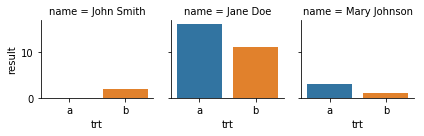

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

## 4 ways to reshape and plot

### 1. value_counts

### 2. crosstab

### 3. Pivot Table

### 4. melt